<a href="https://colab.research.google.com/github/alimozzamandurjoy/E_commerce_shipping_Prediction_of_on_time_delivery_of_products_using_data_mining/blob/main/Ecommerce_Shipping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # for statistical data visualization
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm


## **Import dataset**

In [ ]:
df= pd.read_csv('/content/Train.csv')

In [ ]:
df.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


In [ ]:
df.tail(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10989,10990,B,Ship,5,1,218,5,medium,F,9,1603,0
10990,10991,C,Ship,5,4,219,6,low,M,3,1098,0
10991,10992,F,Ship,5,2,261,5,medium,M,9,1227,1
10992,10993,D,Ship,5,1,236,5,medium,M,3,1906,0
10993,10994,F,Ship,5,1,257,6,low,F,1,1150,0
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


## **Data Profiling**

In [ ]:
df.shape

(10999, 12)

In [ ]:
df.rename(columns={'Reached.on.Time_Y.N':'Reached on Time'}, inplace=True)
df.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached on Time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


View summary of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached on Time      10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Checking Missing values in Dataset



In [ ]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached on Time        0
dtype: int64

Categorical variables

In [ ]:
categorical = [var for var in df.columns if df[var].dtype=='O']
df[categorical].head(10)

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F
5,F,Flight,medium,F
6,D,Flight,low,F
7,F,Flight,low,F
8,A,Flight,low,F
9,B,Flight,medium,F


Numerical variables

In [ ]:
numerical = [var for var in df.columns if df[var].dtype!='O']
df[numerical].head(10)

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached on Time
0,1,4,2,177,3,44,1233,1
1,2,4,5,216,2,59,3088,1
2,3,2,2,183,4,48,3374,1
3,4,3,3,176,4,10,1177,1
4,5,2,2,184,3,46,2484,1
5,6,3,1,162,3,12,1417,1
6,7,3,4,250,3,3,2371,1
7,8,4,1,233,2,48,2804,1
8,9,3,4,150,3,11,1861,1
9,10,3,2,164,3,29,1187,1


## **Exploratory Data Analysis**

In [ ]:
df['Reached on Time'].value_counts(ascending=True)

0    4436
1    6563
Name: Reached on Time, dtype: int64

([<matplotlib.patches.Wedge at 0x7fcfcbd40650>,
 [Text(0.32902377754583456, 1.0496396304491695, '0'),
  Text(-0.32902377754583423, -1.0496396304491697, '1')],
 [Text(0.17946751502500063, 0.5725307075177288, '40.33%'),
  Text(-0.17946751502500047, -0.5725307075177288, '59.67%')])

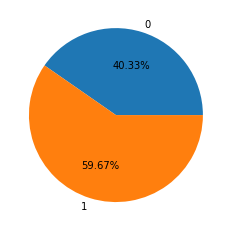

In [ ]:
delay=pd.DataFrame(df.groupby(['Reached on Time'])['ID'].count()/len(df)).reset_index()
plt.pie(delay['ID'],labels=delay['Reached on Time'],autopct='%1.2f%%')

40% of the total deliveries are reached on time.

Text(0, 0.5, 'percentage')

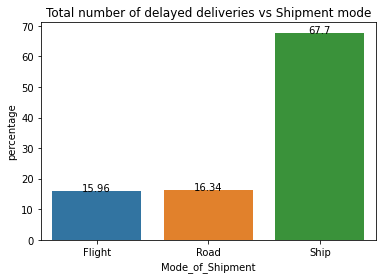

In [ ]:
data_v1 = df[df['Reached on Time']==0]
data_v2=pd.DataFrame((data_v1.groupby(['Mode_of_Shipment'])['ID'].count())/len(data_v1)*100)
data_v2=data_v2.reset_index()
visual=sns.barplot(x="Mode_of_Shipment", y="ID", data=data_v2 )
for index, row in data_v2.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Total number of delayed deliveries vs Shipment mode')
plt.ylabel('percentage')

Observation:

Around 68% of the delayed deliveries are caused when ships are used as a mode of shipments. So, Alternate options like Flight and Road services might be considered to reduce the delayed deliveries

Text(0, 0.5, 'percentage')

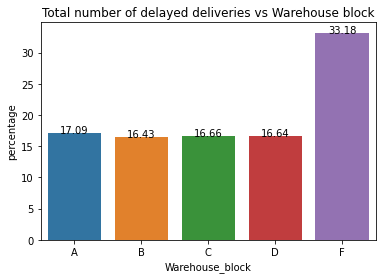

In [ ]:
data_v3=pd.DataFrame((data_v1.groupby(['Warehouse_block'])['ID'].count())/len(data_v1)*100)
data_v3=data_v3.reset_index()
visual=sns.barplot(x="Warehouse_block", y="ID", data=data_v3 )
for index, row in data_v3.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Total number of delayed deliveries vs Warehouse block')
plt.ylabel('percentage')

Observation:

Higher percent of delayed deliveries are recorded in Warehouse block F. For rest of the block,the percent of delayed deliveries are almost consistent.

Text(0, 0.5, 'percentage')

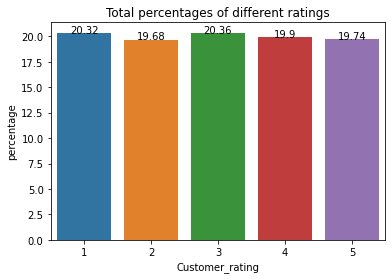

In [ ]:
data_v4=pd.DataFrame((df.groupby(['Customer_rating'])['ID'].count())/len(df)*100)
data_v4=data_v4.reset_index()
visual=sns.barplot(x="Customer_rating", y="ID", data=data_v4 )
for index, row in data_v4.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Total percentages of different ratings')
plt.ylabel('percentage')

Observation:

The percentage of different ratings given by customers seems to same. Almost 20% of the total deliveries received 5 ratings

Text(0.5, 1.0, 'Product importance by Reached on Time or Not')

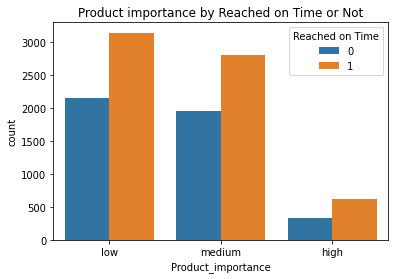

In [ ]:
sns.countplot(x = "Product_importance", data = df, hue="Reached on Time")
plt.title("Product importance by Reached on Time or Not")


Observations:

The higher number of delay deliveries were for low importance product, very less number of high importance products were delivered but the delay also seemed to be less.


Text(0.5, 1.0, 'Gender by Reached on Time or Not')

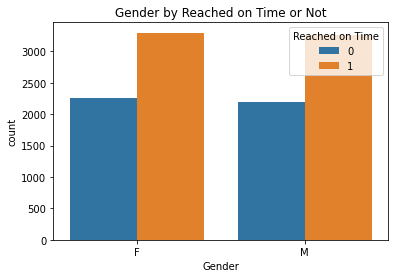

In [ ]:
sns.countplot(x = "Gender", data = df, hue="Reached on Time")
plt.title("Gender by Reached on Time or Not")

Observation:

Both men and women seems to spend same level of amount on average while purchasing a product

Text(0.5, 1.0, 'Warehouse block vs on Time or Not')

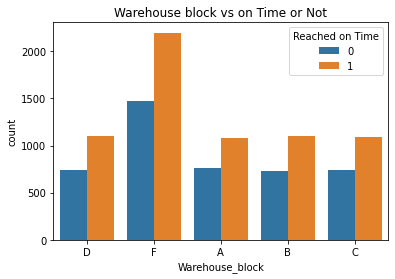

In [ ]:
sns.countplot(x = "Warehouse_block", data = df, hue="Reached on Time")
plt.title("Warehouse block vs on Time or Not")

Observation:

More number of deliveries were from Ware house block 'F' and
for rest of the blocks, the pattern remains same

Text(0.5, 1.0, 'Customer ratings by Gender')

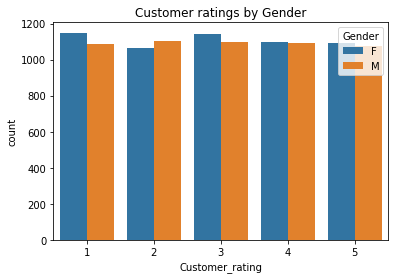

In [ ]:
sns.countplot(x = "Customer_rating", data = df, hue="Gender")
plt.title("Customer ratings by Gender")

Text(0.5, 1.0, 'Average cost of products of different importance')

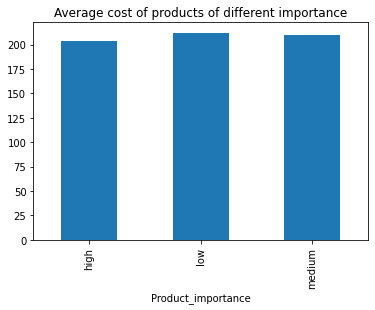

In [ ]:
df.groupby(['Product_importance'])['Cost_of_the_Product'].mean().plot.bar()
plt.title("Average cost of products of different importance")

Observation:

The average value of higher importance is slightly lesser than both low and high importance products. So, the product importance is not assigned based on the monetory value.
Overall there isnt much variation in the features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfcb4b6290>,
      dtype=object)

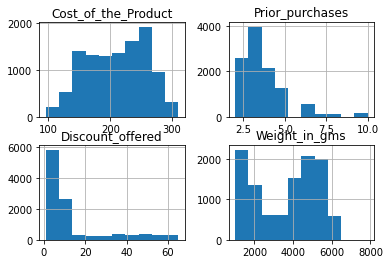

In [ ]:
df[['Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms']].hist()

Observation:

'Discount_offered' is positively skewed
Even 'prior purchase' is also positively skewed

## **Data Preparation**

Chi square test of independence


In [ ]:
#Warehouse_block
crossTab = pd.crosstab(df['Warehouse_block'], df['Reached on Time'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.8959524278243698


In [ ]:
#Mode_of_Shipment
crossTab = pd.crosstab(df['Mode_of_Shipment'],df['Reached on Time'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.6895487627593786


In [ ]:
# Product_importance
crossTab = pd.crosstab(df['Product_importance'],df['Reached on Time'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.002230383104745087


In [ ]:
# Gender
crossTab = pd.crosstab(df['Gender'],df['Reached on Time'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.6367032124181522


Observations:

From chi square test, we can conclude that three of the independent categorical features are not related to the response variable beacause the p value is greater than 0.05. So, these features can be removed and only product importance feature can be included.

---



In [ ]:
data=pd.get_dummies(df,columns=['Product_importance'], drop_first=True)
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached on Time,Product_importance_low,Product_importance_medium
0,1,D,Flight,4,2,177,3,F,44,1233,1,1,0
1,2,F,Flight,4,5,216,2,M,59,3088,1,1,0
2,3,A,Flight,2,2,183,4,M,48,3374,1,1,0
3,4,B,Flight,3,3,176,4,M,10,1177,1,0,1
4,5,C,Flight,2,2,184,3,F,46,2484,1,0,1


## **Prediction**

In [ ]:
from sklearn.preprocessing import LabelEncoder , StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
X=data.drop(['Reached on Time','Warehouse_block','Mode_of_Shipment','Gender'],axis=1)
y=data['Reached on Time']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

#Scaling the data
ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)
X_test = ms.fit_transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train,columns=X.columns)
X_test  =pd.DataFrame(X_test,columns=X.columns)
X_train.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Product_importance_low,Product_importance_medium
0,0.815131,0.2,1.0,0.383178,0.125,0.093750,0.457852,1.0,0.0
1,0.539693,0.8,0.5,0.495327,0.250,0.031250,0.510592,0.0,1.0
2,0.968901,0.0,1.0,0.845794,0.125,0.078125,0.004529,0.0,1.0
3,0.302537,0.6,1.0,0.574766,0.000,0.046875,0.480351,0.0,1.0
4,0.898336,0.8,0.5,0.934579,0.250,0.046875,0.094814,1.0,0.0


Random Forest classifier

In [ ]:
params = {'n_estimators':[100,150], 'criterion':['gini', 'entropy']}
#Hyper parameter tuning
rf_model =GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,scoring='accuracy', cv=5)
rf_model = rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.72      0.64       895
           1       0.77      0.63      0.69      1305

    accuracy                           0.67      2200
   macro avg       0.67      0.68      0.67      2200
weighted avg       0.69      0.67      0.67      2200



SVM 


In [ ]:
svm_model = svm.SVC(gamma='auto',C=5,kernel='rbf')
svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.97      0.72       895
           1       0.95      0.50      0.66      1305

    accuracy                           0.69      2200
   macro avg       0.76      0.73      0.69      2200
weighted avg       0.80      0.69      0.68      2200



## **Classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
clf.score(X_test, y_test)

0.655